# OCR (Part - 1)
### Exploration & Preprocessing

In [68]:
# Required Libraries.
import numpy           as np

from os                import path, getcwd
from PIL               import Image, ImageDraw
from glob              import glob
from matplotlib.pyplot import figure

# using skimage library (pip install sklearn-image)
from skimage import io


In [43]:
# functions for showing and reading images

def readImage(image):
    return Image.open(image)

def showImage(image, h=3):
    figure(figsize=(10, h))
    plt.imshow(image)
    plt.show()

Image: 0


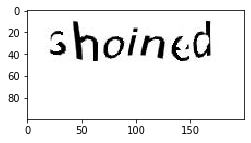

Image: 1


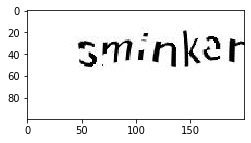

Image: 2


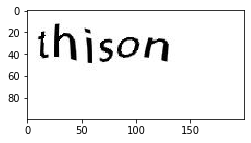

Image: 3


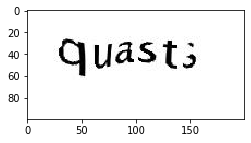

Image: 4


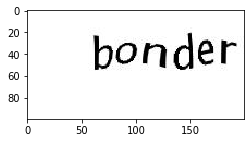

Image: 5


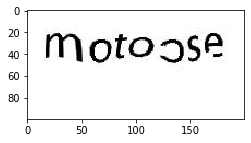

Image: 6


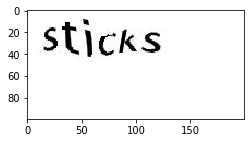

Image: 7


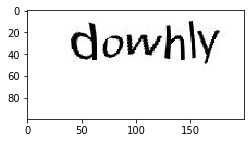

Image: 8


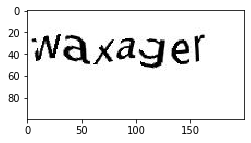

Image: 9


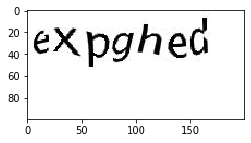

In [48]:
# A glance at the images

# Loading images
images = glob(path.join(getcwd(), 'sample', '*.jpg'))

for i, image in enumerate(images):
    image = readImage(image)
    print('Image: {}'.format(i))
    showImage(image, 2)

In [52]:
# Checking if image is Grayscale or not

image = io.imread(images[1])

print('ndim of image: ', image.ndim)
if image.ndim < 3:
    # ndim = 2 for RGB image
    print('The image is grayscale and the shape of the original image : ', str(image.shape))
else:
    print('The image is RGB and the shape of original image : ', str(image.shape))
    


ndim of image:  3
The image is RGB and the shape of original image :  (100, 200, 3)


### Preprocessing
-> Converting image into greyscale

-> Identifying region of interest

-> cropping the required region

-> Extracting the charactersets from image - to be used later for 
   generating training data

-> saving characters on disk

### Converting image into greyscale

Original Image:  (200, 100)


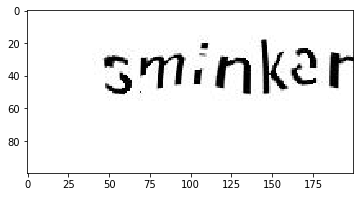

In [54]:
image = readImage(images[1])
print('Original Image: ', str(image.size))
showImage(image)

Converted image :  (200, 100)


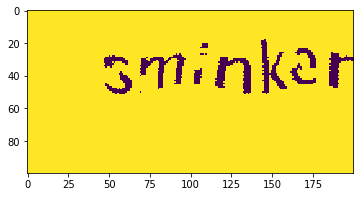

In [56]:
def convertImage(image):
    return image.convert('1')
    
converted_image = convertImage(image)
print('Converted image : ', str(image.size))
showImage(converted_image)

### Making bounding box around the region of interest

In [62]:
def boundingBox(image):
    pixelData = image.load()
    width, height = image.size
    
    # finding coordinates of bounding rectangel
    x_min = width
    y_min = height
    x_max = 0
    y_max = 0
    
    for i in range(width):
        for j in range(height):
            if pixelData[i, j][0] == 0:
                
                # for getting the corners of bounding rectangle
                if i < x_min:
                    x_min = i
                    
                if j < y_min:
                    y_min = j
                    
                if i > x_max:
                    x_max = i
                    
                if j > y_max:
                    y_max = j
                    
    xy = [x_min, y_min, x_max, y_max]
    return xy

x_min, y_min, x_max, y_max = boundingBox(image)
print('x_min: {}, y_min: {}, x_max: {}, y_max: {}'.format(x_min, y_min, x_max, y_max))

x_min: 48, y_min: 20, x_max: 199, y_max: 50


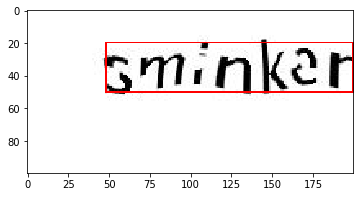

In [64]:
imageWithRectangle = image.copy()
xy = boundingBox(imageWithRectangle)
draw = ImageDraw.Draw(imageWithRectangle)
draw.rectangle(xy, fill=None, outline=(255, 0, 0))
showImage(imageWithRectangle)

### Cropping to image to extract main region

Shape of cropped image is :  (151, 30)


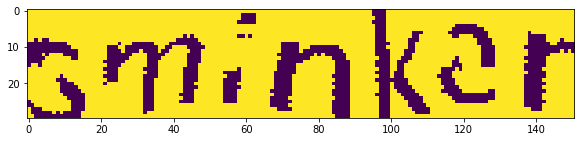

In [67]:
croppedImage = converted_image.copy()
croppedImage = croppedImage.crop(xy)
print('Shape of cropped image is : ', croppedImage.size)
showImage(croppedImage, 2)

### Extracting Individual characters

In [69]:
def showGaps(image):
    seperatorLine = image.copy()
    width, height = seperatorLine.size
    pixels = np.asarray(seperatorLine).transpose()
    draw = ImageDraw.Draw(seperatorLine)
    
    for i in range(width):
        if np.mean(pixels[i]) != 1.0:
            draw.line((i, 0, i, height), fill=0)
    showImage(seperatorLine, 2)


The white lines represents the seperators


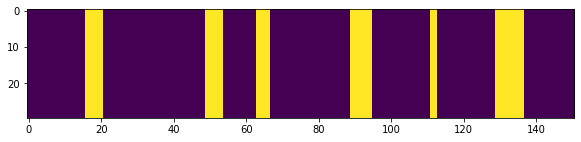

In [70]:
print('The white lines represents the seperators')
showGaps(croppedImage)